<a href="https://colab.research.google.com/github/Ishank2301/Pratise-ML-Algorithums/blob/main/support_vector_regression(org).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Importing the dataset

In [ ]:
df = pd.read_csv('Position_Salaries.csv')

In [ ]:
X = df.iloc[:-1,1:-1].values
y = df.iloc[:-1,-1].values # Notice that i used [:,-1:] thae last : is used to convert it into 2d array.

# or we can use y = y.reshape(len(y),axis=1)
y = y.reshape(len(y),1) # Here 1 as in refers to number of rows {increase it to increase the row}

In [ ]:
print(X)

[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In [ ]:
print(y)


[[ 45000]
 [ 50000]
 [ 60000]
 [ 80000]
 [110000]
 [150000]
 [200000]
 [300000]
 [500000]]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X  = sc_X.fit_transform(X)
y  = sc_y.fit_transform(y)

In [ ]:
print(X)

[[-1.54919334]
 [-1.161895  ]
 [-0.77459667]
 [-0.38729833]
 [ 0.        ]
 [ 0.38729833]
 [ 0.77459667]
 [ 1.161895  ]
 [ 1.54919334]]


In [ ]:
print(y)


[[-0.85451438]
 [-0.81923626]
 [-0.74868003]
 [-0.60756756]
 [-0.39589886]
 [-0.11367393]
 [ 0.23910723]
 [ 0.94466957]
 [ 2.35579423]]


## Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regr = SVR(kernel = 'rbf')  #Refer to the site to learn more about kernels.
regr.fit(X,y)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicting a new result

In [ ]:
sc_y.inverse_transform(regr.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[179729.66120423]])

## Visualising the SVR results

Text(0, 0.5, 'Salary')

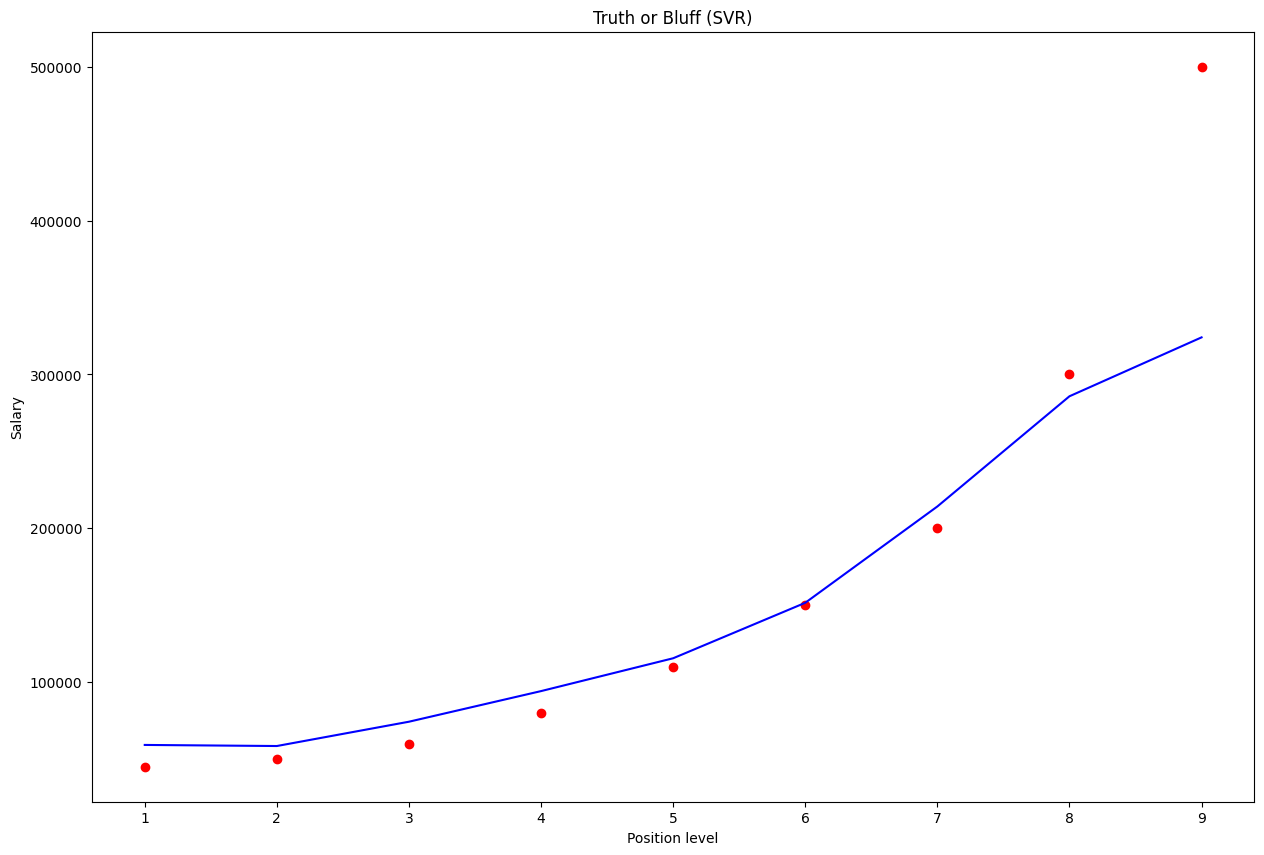

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regr.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Visualising the SVR results (for higher resolution and smoother curve)

/tmp/ipython-input-1249724984.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


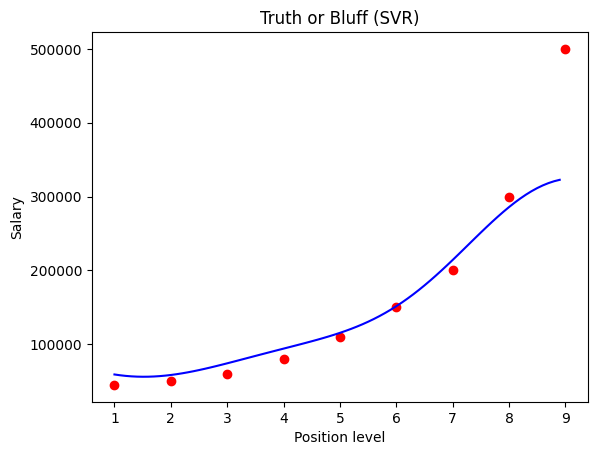

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regr.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()